**TANPA SAMPLING**

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.43      0.52        54
           1       0.86      0.47      0.61        40
           2       0.67      0.91      0.77       106

    accuracy                           0.69       200
   macro avg       0.74      0.60      0.63       200
weighted avg       0.71      0.69      0.67       200



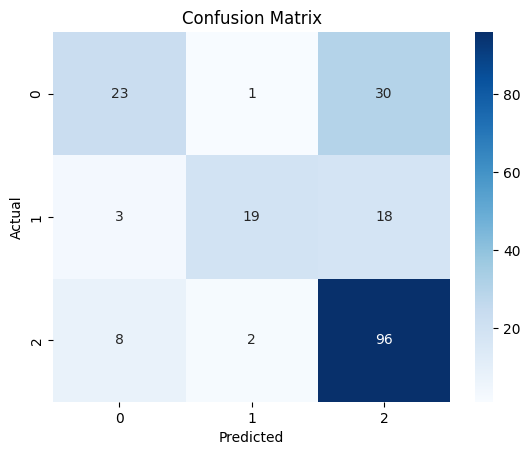

Accuracy: 69.00%


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

Encoder = LabelEncoder()


# 1. Baca dataset Anda
df = pd.read_csv('../topik/hasil_TOPIC & SENTIMEN sebelum_smote.csv')
df.drop(df.tail(3).index, inplace=True)

df['topic_label']  = Encoder.fit_transform(df['topic_label'] )
# 4. Lakukan ekstraksi fitur teks dengan TF-IDF sebelum splitting data
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)  # Tambahkan max_df dan min_df
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['topic_label'], test_size=0.2,random_state=42)

# 5. Latih model SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
# Save the model to a file
model_filename = '../model/svm_sebelum_smote_aspek.joblib'
joblib.dump(svm_classifier, model_filename)

# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

plt.show()

# 9. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

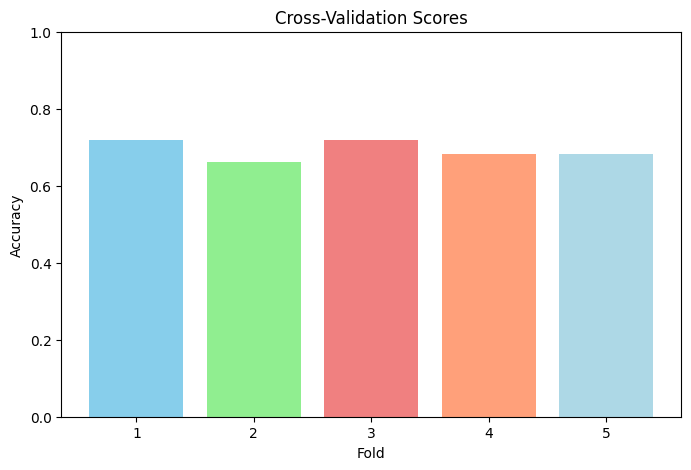

Mean CV accuracy: 69.25%


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 5))
for i in range(len(cv_scores)):
    plt.bar(i+1, cv_scores[i], color=colors[i % len(colors)])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()

print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

cv_scores_df = pd.DataFrame({"K/Fold": range(1, len(cv_scores) + 1), "Accuracy": cv_scores})
cv_scores_df

cv_scores_df.to_csv('../eval/kfold_sebelum_smote_topik.csv', index=True)

## SMOTE

data before smote 1000
topic before smote topic_label
Penggunaan Produk    531
Kualitas Produk      266
Pembelian Produk     203
Name: count, dtype: int64
data after smote 1593
topic after smote topic_label
0    531
2    531
1    531
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.89      0.93      0.91       107
           2       0.86      0.81      0.83       112

    accuracy                           0.86       319
   macro avg       0.86      0.86      0.86       319
weighted avg       0.86      0.86      0.86       319



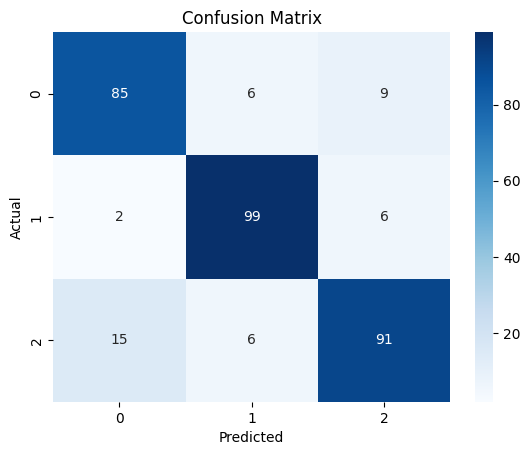

Accuracy: 86.21%


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import joblib

# 1. Baca dataset Anda
df = pd.read_csv('../topik/hasil_TOPIC & SENTIMEN sebelum_smote.csv')
df.drop(df.tail(3).index, inplace=True)
print('data before smote',len(df))
print('topic before smote',df['topic_label'].value_counts())
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['topic_label']  = Encoder.fit_transform(df['topic_label'] )

tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)

X=tfidf_vectorizer.fit_transform(df['Text'])
y=df['topic_label']

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

print('data after smote',len(y_resampled))
print('topic after smote',y_resampled.value_counts())

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

# 4. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# Save the model to a file
model_filename = '../model/svm_sesudah_smote_aspek.joblib'
joblib.dump(svm_classifier, model_filename)

# 5. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 8. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# 9. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


In [18]:
df = pd.DataFrame(X_resampled)
df.rename(columns={0:'TF-IDF'}, inplace=True)
df['topik_label'] = y_resampled
# mengembalikan kalimat asli dari tfidf
feature_names = tfidf_vectorizer.get_feature_names_out()

kalimat_asli = []
for index, row in df.iterrows():
    vektor_ulasan = X_resampled[index]
    kata_kunci = [feature_names[i] for i in vektor_ulasan.indices]
    kalimat_asli.append(' '.join(kata_kunci))

# tambahkan kolom baru dengan kalimat asli ke dalam data frame
df['kalimat_asli'] = kalimat_asli
df.to_csv('../smote/data_smote_topik.csv', index=False)
#mengambil data sintetik
df_sintetik = df.iloc[1000:]
#menyimpan dalam bentuk csv
df_sintetik.to_csv('../smote/data_sintetik_topik.csv', index=False)
df

,bobot_kalimat,topik_label,kalimat_asli
0,"(0, 60)\t0.08650742834904963\n (0, 351)\t0....",0,banget kemas friendly travel bantu cukup hilan...
1,"(0, 467)\t0.10809739094237301\n (0, 810)\t0...",2,muka works deh ilang cepet akhir kering bikin ...
2,"(0, 217)\t0.1554566599144668\n (0, 25)\t0.1...",1,for and skin my that after normal its think in...
3,"(0, 584)\t0.21695025434991483\n (0, 103)\t0...",0,pokok bintang adem masker buat ku kadang kalau...
4,"(0, 23)\t0.17882139385607318\n (0, 155)\t0....",2,an csm prone acne seger tuh cicanya khas aroma...
...,...,...,...
1588,"(0, 318)\t0.0193194725443612\n (0, 10)\t0.0...",1,jerawat akhir deh jadi tuh lebih coba csman cu...
1589,"(0, 318)\t0.02420646255856288\n (0, 158)\t0...",1,jerawat cukup banget bikin my watery acne pron...
1590,"(0, 374)\t0.13936294865916432\n (0, 550)\t0...",1,kompres pakai bruntusan buat asa ngebantu bang...
1591,"(0, 798)\t0.10948839869287821\n (0, 209)\t0...",1,wajah face baru cocok kadang buat hidrasi tidu...


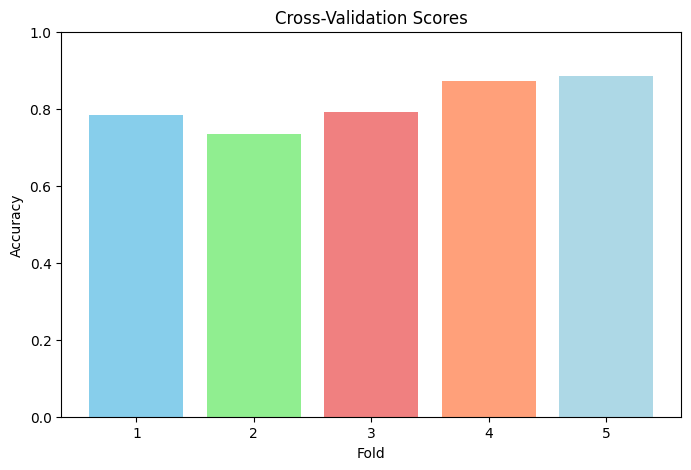

Mean CV accuracy: 81.41%


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

cv_scores = cross_val_score(svm_classifier, X_resampled, y_resampled, cv=5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 5))
for i in range(len(cv_scores)):
    plt.bar(i+1, cv_scores[i], color=colors[i % len(colors)])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()

print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

cv_scores_df = pd.DataFrame({"K/Fold": range(1, len(cv_scores) + 1), "Accuracy": cv_scores})
cv_scores_df
cv_scores_df.to_csv('../eval/kfold_sesudah_smote_topik.csv', index=True)